NPM: 5200411158

_________________________
Nama: Rendi Setya Nugraha


In [ ]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [ ]:
import io

from google.colab import files
filenya = files.upload()

df = pd.read_csv(io.StringIO(filenya['emailspam.csv'].decode('utf-8')))
print(df)

Saving emailspam.csv to emailspam (2).csv
      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0

In [ ]:
#baca data csv
# csv_data = pd.read_csv("emailspam.csv", delimiter=';', header=0)
data = np.array(df) #konversi data csv menjadi array
data = data.astype(float) #konversi data menjadi float
n_data = len(data[:,0]) #menghitung banyak data

print('jumlah data: ',n_data)

#membaca jumlah feature
n_feature = len(data[0,:]) - 1

print('jumlah feature: ', n_feature)

jumlah data:  4601
jumlah feature:  57


In [ ]:
#membagi data: data latih dan data uji
rasio_data_latih = 0.7
n_data_latih = int(n_data * rasio_data_latih)
data_latih = data[:n_data_latih,:]
data_uji = data[n_data_latih:,:]
n_data_uji = len(data_uji[:,0])

print('jumlah data latih', n_data_latih)
print('jumlah data uji', n_data_uji)

np.seterr(invalid='ignore')

#normalisasi data latih dalam rentang [0.1, 0.9]
for i in range (1, n_feature + 1):
    data_latih[:, i] = 0.1 + ((data_latih[:,i] - min(data_latih[:,i]))/(max(data_latih[:,i]) - min(data_latih[:,i]))) * 0.8

#normalisai data latih dalam rentang [0.1, 0.9]
for i in range (1, n_feature + 1):
    data_uji[:,i] = 0.1 + ((data_uji[:,i] - min(data_uji[:,i])) / (max(data_uji[:,i]) - min(data_uji[:,i]))) * 0.8

jumlah data latih 3220
jumlah data uji 1381


In [ ]:
#inisialisasi parameter jst
n_input = n_feature #jumlah neuron pada input layer
n_hidden = 1        #jumlan neuron pada hidden layen
n_output = 1        #jumlah neuron pada output layer
n_epoch = 100     #jumlah epoch/iterasi maksimal
alfa = 0.3 #learning rate

np.random.seed(seed=710)

#inisialisasi bobot MLP dalam rentang [-1, 1]
w = np.random.rand(n_hidden, n_input) * 2 - 1
b1 = np.random.rand(n_hidden) * 2 - 1
v = np.random.rand(n_output, n_hidden) #*2-1
b2 = np.random.rand(n_output) * 2 - 1

In [ ]:
#learning
itr = 0 
MSE = np.zeros(n_epoch + 1)
while(itr <= n_epoch) : 
    print ("Epoch ke-" + str(itr))

    for idx_data in range (0, n_data_latih):
        label = data[idx_data, n_feature]
        feature = data_latih[idx_data,0:n_feature]

        #Hitung nilai pada hidden layer
        z = np.zeros(n_hidden)
        for i in range(0, n_hidden):
            net = np.sum(feature * w[i]) + b1[i]
            z[i] = 1/(1 + math.exp(-net))

        #hitung nilai pada output layer
        y = np.zeros(n_output)
        f_output = np.zeros(n_output)
        for i in range (0, n_output):
            net = np.sum(z * v[i]) + b2[i]
            y[i] = 1/(1 + math.exp(-net))

        #hitung error pada output layer
        error = label - y
        
        #hitung jumlah error
        sum_squared_error = sum(error**2)

        #hitung faktor koreksi pada output layer
        for i in range(0, n_output) :
          f_output[i] = error * y[i] * (1 - y[i])
        
        #hitung perbaikan bobot antara pada output dan hiddden layer
        delta_v = np.zeros(shape = (n_output, n_hidden))
        for i in range(0, n_output):
            delta_v[i,:] = alfa * f_output[i] * z

        #hitung perbaikan bobot BIAS (b2) antara output dan hidden layer
        delta_b2 = np.zeros(n_output)
        for i in range(0, n_output):
            delta_b2[i] = alfa * f_output[i] * 1

        #hitung faktor koreksi pada hidden layer
        f_hidden = np.zeros(n_hidden)
        for i in range(0, n_hidden):
            #langkah 1 - hitung f_hidden_net
            f_hidden_net = sum(f_output * v[:, i]) 
            #langkah 2 - hitung f_hidden
            f_hidden[i] = f_hidden_net * z[i] * (1 - z[i])

        #Hitung perbaikan bobot antara hidden dan input layer
        delta_w = np.zeros(shape=(n_hidden, n_input))
        for i in range(n_hidden):
            delta_w = alfa * f_hidden[i] * feature

        #Hitung perbaikan bobot antara hidden dan input layer
        delta_b1 = np.zeros(n_hidden)
        for i in range(n_hidden):
            delta_b1 = alfa * f_hidden[i] * 1

        #update semua bobot
        w = w + delta_w
        b1 = b1 + delta_b1
        v = v + delta_v
        b2 = b2 + delta_b2
    
    #end for

    #Hitung MSE
    MSE[itr] = sum_squared_error / n_data_latih
    itr += 1

#end while

Epoch ke-0
Epoch ke-1
Epoch ke-2
Epoch ke-3
Epoch ke-4
Epoch ke-5
Epoch ke-6
Epoch ke-7
Epoch ke-8
Epoch ke-9
Epoch ke-10
Epoch ke-11
Epoch ke-12
Epoch ke-13
Epoch ke-14
Epoch ke-15
Epoch ke-16
Epoch ke-17
Epoch ke-18
Epoch ke-19
Epoch ke-20
Epoch ke-21
Epoch ke-22
Epoch ke-23
Epoch ke-24
Epoch ke-25
Epoch ke-26
Epoch ke-27
Epoch ke-28
Epoch ke-29
Epoch ke-30
Epoch ke-31
Epoch ke-32
Epoch ke-33
Epoch ke-34
Epoch ke-35
Epoch ke-36
Epoch ke-37
Epoch ke-38
Epoch ke-39
Epoch ke-40
Epoch ke-41
Epoch ke-42
Epoch ke-43
Epoch ke-44
Epoch ke-45
Epoch ke-46
Epoch ke-47
Epoch ke-48
Epoch ke-49
Epoch ke-50
Epoch ke-51
Epoch ke-52
Epoch ke-53
Epoch ke-54
Epoch ke-55
Epoch ke-56
Epoch ke-57
Epoch ke-58
Epoch ke-59
Epoch ke-60
Epoch ke-61
Epoch ke-62
Epoch ke-63
Epoch ke-64
Epoch ke-65
Epoch ke-66
Epoch ke-67
Epoch ke-68
Epoch ke-69
Epoch ke-70
Epoch ke-71
Epoch ke-72
Epoch ke-73
Epoch ke-74
Epoch ke-75
Epoch ke-76
Epoch ke-77
Epoch ke-78
Epoch ke-79
Epoch ke-80
Epoch ke-81
Epoch ke-82
Epoch ke-83
Ep

--------------------------RESULT---------------------------
Mean Square Error: 2.1271321705685752e-09


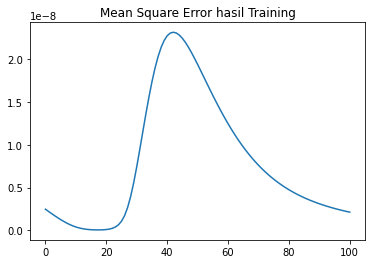

In [ ]:
print("--------------------------RESULT---------------------------")
print("Mean Square Error: " +str(MSE[n_epoch]))

#print grafik MSE hasil training
plt.title("Mean Square Error hasil Training")
plt.plot(MSE)
plt.autoscale(enable=True, axis='both', tight=None)
plt.show(block=False)